<a href="https://colab.research.google.com/github/Alaaeid2/Text-Recognition/blob/main/segmented_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

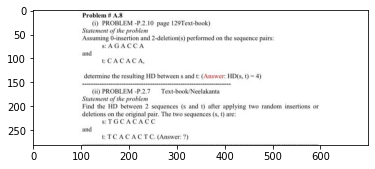

In [ ]:
img=cv2.imread('/content/drive/MyDrive/SAG/Dataset/calc_text_exrtraction_run_time/Book/image.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


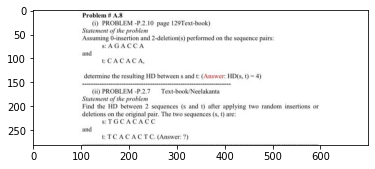

In [ ]:
h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

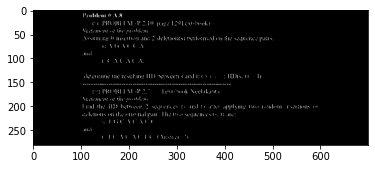

In [ ]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

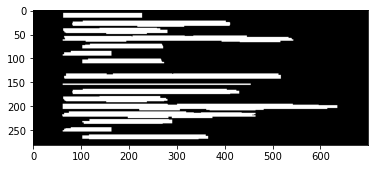

In [ ]:
#dilation
kernel = np.ones((3,85), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [ ]:

#find the contours
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)


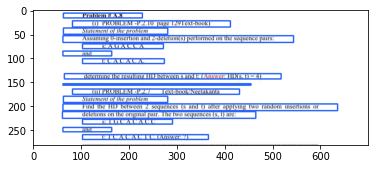

In [ ]:
img2 = img.copy()
word_list=[]
for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    word_list.append([x, y, x+w, y+h])
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

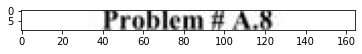

In [ ]:
i_word=word_list[0]
roi9=img[i_word[1]:i_word[3], i_word[0]:i_word[2]]
plt.imshow(roi9)

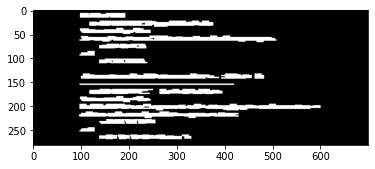

In [ ]:


#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

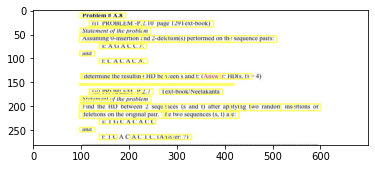

In [ ]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 200:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3);

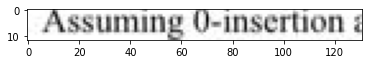

In [ ]:
word=words_list[2]

roi9=img[word[1]:word[3], word[0]:word[2]]
plt.imshow(roi9)

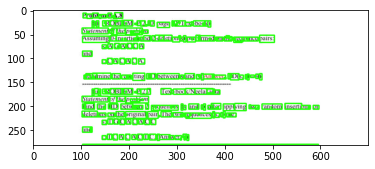

In [ ]:


image = img.copy()
original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)

cnts = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 600
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area < min_area:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite("ROI_{}.png".format(image_number), ROI)
        image_number += 1

plt.imshow(image)
 